In [2]:
import pandas as pd

file_paths = [
    r"C:\Users\El\Downloads\prabs_2.old.csv",
    r"C:\Users\El\Downloads\prabowo_2025-04-01.csv",
    r"C:\Users\El\Downloads\prabowo_2025-03-21.csv",
    r"C:\Users\El\Downloads\prabowo_2025-03-20.csv",
    r"C:\Users\El\Downloads\prabowo sentimen.csv"
]

merged_data = []

# Loop untuk membaca dan mengecek setiap file
for path in file_paths:
    try:
        df = pd.read_csv(path)
        if not df.empty:
            merged_data.append(df)
            print(f"✅ Loaded {path}, {len(df)} rows")
        else:
            print(f"⚠️ Skipped {path} (empty)")
    except Exception as e:
        print(f"❌ Failed to load {path}: {e}")

# Gabungkan semua DataFrame valid
if merged_data:
    final_df = pd.concat(merged_data, ignore_index=True)
    output_path = r"C:\Users\El\Downloads\prabowo_merged.csv"
    final_df.to_csv(output_path, index=False)
    print(f"\n🎉 File gabungan disimpan di: {output_path}")
    print(f"Total baris: {len(final_df)}")
else:
    print("🚫 Tidak ada file valid yang bisa digabungkan.")


✅ Loaded C:\Users\El\Downloads\prabs_2.old.csv, 127 rows
✅ Loaded C:\Users\El\Downloads\prabowo_2025-04-01.csv, 106 rows
✅ Loaded C:\Users\El\Downloads\prabowo_2025-03-21.csv, 59 rows
✅ Loaded C:\Users\El\Downloads\prabowo_2025-03-20.csv, 119 rows
✅ Loaded C:\Users\El\Downloads\prabowo sentimen.csv, 985 rows

🎉 File gabungan disimpan di: C:\Users\El\Downloads\prabowo_merged.csv
Total baris: 1396


In [8]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load data hasil merge
df = pd.read_csv(r"C:\Users\El\Downloads\prabowo_merged.csv")

# Inisialisasi stopword dan stemmer
stop_factory = StopWordRemoverFactory()
stem_factory = StemmerFactory()
stopwords = stop_factory.create_stop_word_remover()
stemmer = stem_factory.create_stemmer()

# Fungsi preprocessing
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)  # hapus URL
    text = re.sub(r"@\w+|#\w+", "", text)        # hapus mention dan hashtag
    text = re.sub(r"[^a-zA-Z\s]", "", text)      # hapus angka dan simbol
    text = stopwords.remove(text)                # hapus stopwords
    text = stemmer.stem(text)                    # stemming
    return text.strip()

# Terapkan preprocessing ke kolom full_text
df['clean_text'] = df['full_text'].apply(preprocess)

# Simpan hasil ke file baru
df.to_csv(r"C:\Users\El\Downloads\prabowo_clean.csv", index=False)
print("✅ Preprocessing selesai. File disimpan sebagai prabowo_clean.csv")



✅ Preprocessing selesai. File disimpan sebagai prabowo_clean.csv


In [9]:
# Lihat beberapa data yang sudah diproses
print(df['clean_text'].head())


0                      sekadar ingat akhir dollar rebu
1    debat interview presiden prabowo pak presiden ...
2    milu curang jabat korup polisi korup mata uang...
3    prabowo bukan orang jahat cuma inkompeten iya ...
4    somasi bukan diam bawa acara meet nite live ma...
Name: clean_text, dtype: object


In [26]:
import pandas as pd

# Path ke file hasil preprocessing
clean_path = "C:/Users/El/Downloads/prabowo_clean.csv"  # Sesuaikan dengan lokasi file kamu
output_path = "C:/Users/El/Downloads/tweet2_sample_for_labeling.csv"

# Load data hasil preprocessing
df = pd.read_csv(clean_path)

# Ambil sampel dan tambahkan kolom 'sentiment' kosong
sample_size = 1000  # Ganti sesuai kebutuhan
sample = (
    df[['full_text', 'clean_text']]
    .dropna()
    .sample(n=sample_size, random_state=42)
    .reset_index(drop=True)
)
sample['sentiment'] = ""  # Label kosong untuk diisi manual

# Simpan ke file CSV baru
sample.to_csv(output_path, index=False)
print("File siap untuk labeling disimpan di:", output_path)


File siap untuk labeling disimpan di: C:/Users/El/Downloads/tweet2_sample_for_labeling.csv


In [30]:
from transformers import pipeline
import pandas as pd

# Load data
df = pd.read_csv("C:/Users/El/Downloads/tweet2_sample_for_labeling.csv")
df = df.dropna(subset=['clean_text'])
df = df[df['clean_text'].str.strip() != '']

# Load model sentiment multilingual yang sudah dilatih
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Ambil teks dan batasi untuk uji coba
texts = df['clean_text'].tolist()
results = classifier(texts[:1000])  

# Konversi label bintang ke sentimen
def convert_label(label):
    stars = int(label.split()[0])
    if stars <= 2:
        return "negatif"
    elif stars == 3:
        return "netral"
    else:
        return "positif"

# Ambil hasil dan ubah label
sentiments = [convert_label(r['label']) for r in results]

# Pastikan kolom sentiment bertipe string
df['sentiment'] = ""
df.loc[:999, 'sentiment'] = sentiments

# Simpan ke file
df.to_csv("C:/Users/El/Downloads/tweet2_with_sentiment.csv", index=False)
print("✓ Sentimen berhasil diprediksi dan disimpan.")


Device set to use cpu


✓ Sentimen berhasil diprediksi dan disimpan.


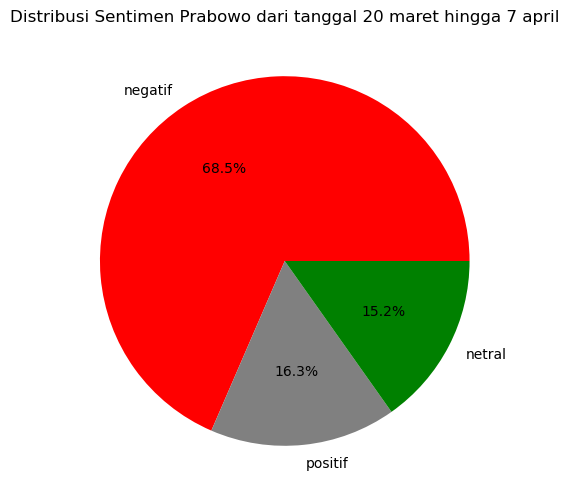

In [32]:
import matplotlib.pyplot as plt

# Hitung distribusi
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title("Distribusi Sentimen Prabowo dari tanggal 20 maret hingga 7 april")
plt.show()


In [1]:
sentiment_counts.plot(kind='bar', color=['red', 'grey', 'green'])
plt.title("Jumlah Tweet per Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=0)
plt.show()


NameError: name 'sentiment_counts' is not defined

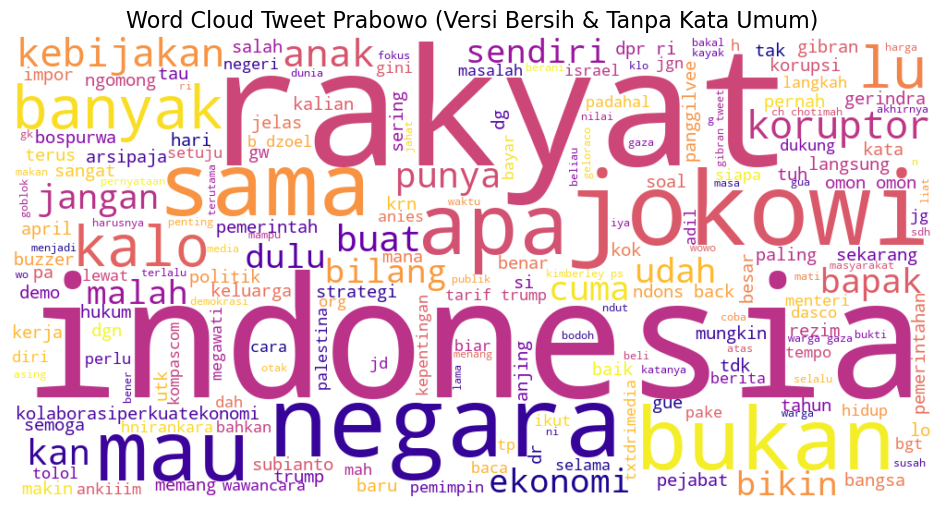

In [39]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Load CSV
df = pd.read_csv("C:/Users/El/Downloads/prabowo_merged.csv")
df = df[df['full_text'].notna()]

# Gabungkan semua teks
text = ' '.join(df['full_text'].astype(str))

# Bersihkan URL, simbol, dan ubah ke lowercase
text = re.sub(r"http\S+", "", text)  # hapus link
text = re.sub(r"[^a-zA-Z\s]", " ", text)  # hapus simbol/tanda baca
text = text.lower()  # ubah jadi huruf kecil semua

# Stopwords dari Sastrawi
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

# Tambahan stopwords manual (versi lengkap)
custom_stopwords = {
    'prabowo', 'pak', 'aku', 'kamu', 'saya', 'yang', 'aja', 'presiden', 'amp', 'grok', 'banget',
    'dong', 'nih', 'lah', 'ya', 'ga', 'gak', 'nya', 'dan', 'di', 'ke', 'dari',
    'untuk', 'ini', 'itu', 'rt', 'via', 'yg', 'https', 'co', 't', 'twitter',
    'orang', 'dengan', 'karena', 'akan', 'lebih', 'semua', 'jadi', 'kalau',
    'sih', 'mas', 'mbak', 'bang', 'bro', 'sist', 'eh', 'emang'
}
stopwords.update(custom_stopwords)

# Hapus semua kata yang termasuk stopwords
words = [word for word in text.split() if word not in stopwords]
filtered_text = ' '.join(words)

# Generate Word Cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma',
    max_words=200
).generate(filtered_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Tweet Prabowo (Versi Bersih & Tanpa Kata Umum)", fontsize=16)
plt.show()
